In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing face mask dataset

In [3]:
# API ko fetch dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset
# rules accept krna was not compulsory this time

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!ls


data		       sample_data  test3.jpg		   without_mask_1004.jpg
face-mask-dataset.zip  test1.jpg    test4.png		   without_mask_1017.jpg
kaggle.json	       test2.jpg    without_mask_1000.jpg


In [5]:
# extracting the compresses dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


Importing the dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask') # this will be a list to store the files present in respective directory
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1473.jpg', 'with_mask_1377.jpg', 'with_mask_73.jpg', 'with_mask_53.jpg', 'with_mask_2954.jpg']
['with_mask_259.jpg', 'with_mask_741.jpg', 'with_mask_2130.jpg', 'with_mask_2544.jpg', 'with_mask_1863.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1920.jpg', 'without_mask_1720.jpg', 'without_mask_3018.jpg', 'without_mask_3326.jpg', 'without_mask_3803.jpg']
['without_mask_1424.jpg', 'without_mask_1414.jpg', 'without_mask_1940.jpg', 'without_mask_3654.jpg', 'without_mask_3225.jpg']


In [9]:
print("Number of with mask images ",len(with_mask_files))
print("Number of without mask images ",len(without_mask_files))

Number of with mask images  3725
Number of without mask images  3828


Creating labels for the two class of images:

1. with mask : label = 1
2. without mask : label = 0

If both with mask and without mask ek hi directory me merged hote, toh in that case we just simply with_mask... ko 1 and without_mask.. file names ko 0 krte. But here they are laredy given separately

In [10]:
# create the label

with_mask_labels = [1]*len(with_mask_files)

without_mask_labels = [0]*len(without_mask_files)

In [11]:
print(with_mask_labels) # kya badhiya technique hai python me list of all 1's or all 0's create krne ki

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [12]:
print(without_mask_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels = with_mask_labels + without_mask_labels # array me elementwise addition hota, but list me concatenation ho jayeega

In [15]:
print(len(labels))

7553


In [16]:
print(labels[0:5])

[1, 1, 1, 1, 1]


In [17]:
print(labels[-5:]) # index -5,-4,-3,-2,-1 will be printed

[0, 0, 0, 0, 0]


Displaying the images

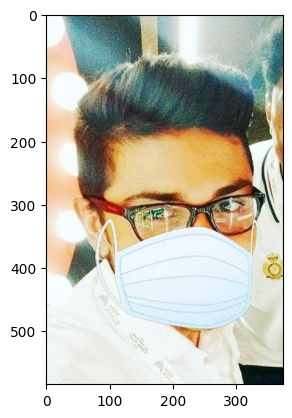

In [18]:
# display with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_980.jpg')
imgplot = plt.imshow(img)
plt.show()

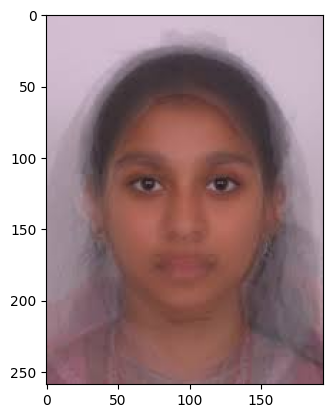

In [19]:
# display without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1568.jpg')
imgplot = plt.imshow(img)
plt.show()

In [20]:
# clearly shape of images me koi uniformity nhi hai. Need to do image processing

1. Resize the images
2. convert images to numpy array



In [21]:
# convert image to numpy array and resizing simultaneously : using PIL this time

with_mask_path = '/content/data/with_mask/' # additional / manually add krna padega, path me image file ka name conca krke use krna hai na isliye

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file) # PIL ka Image.open() function demands the name of image with the proper directory in which it is present
  image = image.resize((128,128)) # one by one each image reshaped ho jayegi
  image = image.convert('RGB') # some are colored some are graystyle, so to get rid of that conflick do this
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

# data me sbkuch append krna hai

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
len(data)

7553

In [23]:
type(data)

list

In [24]:
# individual numpy arrays of individual images
data[0]

array([[[192, 163, 155],
        [178, 149, 139],
        [158, 126, 115],
        ...,
        [175, 141, 137],
        [166, 133, 131],
        [155, 125, 123]],

       [[186, 156, 146],
        [176, 145, 134],
        [154, 120, 106],
        ...,
        [178, 145, 139],
        [173, 141, 136],
        [170, 139, 137]],

       [[183, 149, 136],
        [168, 133, 119],
        [151, 114,  98],
        ...,
        [173, 140, 134],
        [178, 146, 140],
        [176, 145, 143]],

       ...,

       [[204, 160, 133],
        [202, 158, 130],
        [199, 155, 126],
        ...,
        [164, 150, 150],
        [104,  90,  91],
        [ 64,  48,  52]],

       [[203, 158, 129],
        [200, 157, 126],
        [197, 154, 122],
        ...,
        [129, 115, 115],
        [ 72,  58,  59],
        [ 44,  33,  35]],

       [[200, 155, 124],
        [197, 152, 121],
        [194, 150, 117],
        ...,
        [ 82,  67,  67],
        [ 64,  51,  51],
        [ 52,  40,  42]]

In [25]:
type(data[0])

numpy.ndarray

In [26]:
data[0].shape

(128, 128, 3)

In [27]:
# labels and data_list to numpy array

X = np.array(data)
Y = np.array(labels)

In [28]:
type(X)

numpy.ndarray

In [29]:
type(Y)

numpy.ndarray

Train Test Split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [31]:
print(X.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [32]:
# scaling the data

x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [33]:
x_train_scaled[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

# Building the Convolutional Neural Network (CNN)

In [34]:
import tensorflow as tf
from tensorflow import keras # keras contains the features of both pytorch and tensorflow

In [35]:
# setting the archetecture of the neural network

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))



The code you've provided is an example of creating a Convolutional Neural Network (CNN) model using the Keras library. This model appears to be designed for a classification task with two classes, as indicated by `num_of_classes = 2`. Let me break down the code step by step to explain what each part does:

1. Importing the necessary libraries:

   ```python
   import keras
   ```

   This code snippet imports the Keras library, which is a popular high-level neural networks API that can run on top of TensorFlow or other deep learning frameworks.

2. Creating a Sequential model:

   ```python
   model = keras.Sequential()
   ```

   This code initializes a Sequential model, which is a linear stack of layers. You can add layers to this model one by one, and the data flows through them sequentially.

3. Adding a Convolutional Layer:

   ```python
   model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
   ```

   This line adds the first convolutional layer to the model. It has 32 filters, a 3x3 kernel size, and uses the ReLU (Rectified Linear Unit) activation function. The `input_shape` parameter specifies that the input images are expected to be of size 128x128 pixels with 3 color channels (RGB).

4. Adding a Max Pooling Layer:

   ```python
   model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
   ```

   After the first convolutional layer, a max-pooling layer is added. Max-pooling reduces the spatial dimensions of the feature maps obtained from the convolutional layer. In this case, it reduces the size of the feature maps by a factor of 2x2.

5. Adding Another Convolutional Layer and Max Pooling Layer:

   ```python
   model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
   model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
   ```

   The code adds a second convolutional layer with 64 filters, followed by another max-pooling layer. The activation function is again ReLU.

6. Flattening Layer:

   ```python
   model.add(keras.layers.Flatten())
   ```

   This layer flattens the output from the previous layers into a one-dimensional vector. This is necessary before passing the data to fully connected layers.

7. Adding Fully Connected Layers:

   ```python
   model.add(keras.layers.Dense(128, activation='relu'))
   model.add(keras.layers.Dropout(0.5))
   model.add(keras.layers.Dense(64, activation='relu'))
   model.add(keras.layers.Dropout(0.5))
   ```

   The code adds two fully connected (Dense) layers with 128 and 64 units, respectively. The ReLU activation function is applied to both layers. Dropout layers with a rate of 0.5 are added after each of these fully connected layers. Dropout is a regularization technique that helps prevent overfitting.

8. Output Layer:

   ```python
   model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))
   ```

   The final dense layer consists of `num_of_classes` units, which is 2 in this case, and uses the sigmoid activation function. This is common for binary classification tasks, where each unit can represent the probability of belonging to one of the two classes.

In summary, this code defines a CNN model for a binary classification task, where input images are 128x128 pixels with 3 color channels. The model consists of convolutional layers, max-pooling layers, fully connected layers, and dropout layers. The output layer provides binary classification predictions using the sigmoid activation function.

In [36]:
# compile the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [37]:
# training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)
# history me store krke plot krna ho jata hai

Epoch 1/5
170/170 [==============================] - 17s 23ms/step - loss: 0.5313 - acc: 0.7462 - val_loss: 0.2914 - val_acc: 0.8711
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.3175 - acc: 0.8782 - val_loss: 0.2353 - val_acc: 0.9008
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2708 - acc: 0.8930 - val_loss: 0.2087 - val_acc: 0.9124
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2330 - acc: 0.9090 - val_loss: 0.2636 - val_acc: 0.8843
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2187 - acc: 0.9170 - val_loss: 0.2079 - val_acc: 0.9174


Model Evaluation on test/unknown data

In [38]:
loss, accuracy = model.evaluate(x_test_scaled,y_test)
print('Test Accuracy ',accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.2595 - acc: 0.9067
Test Accuracy  0.9066843390464783


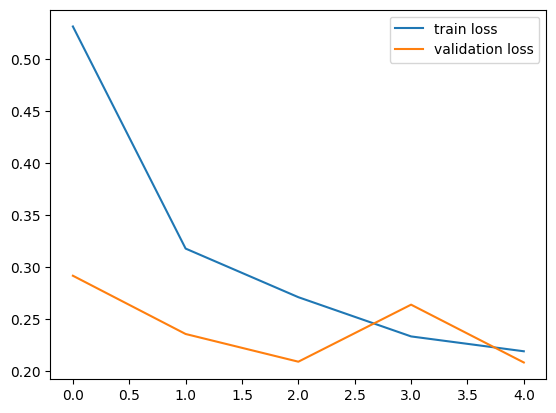

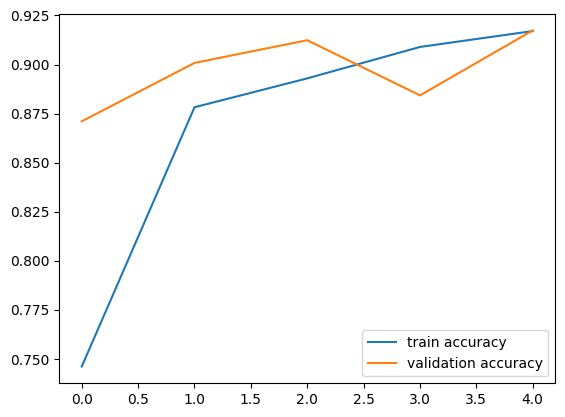

In [39]:
h = history

# plotting the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plotting the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()


# Predictive System

Path of the image to be predicted: /content/test1.jpg


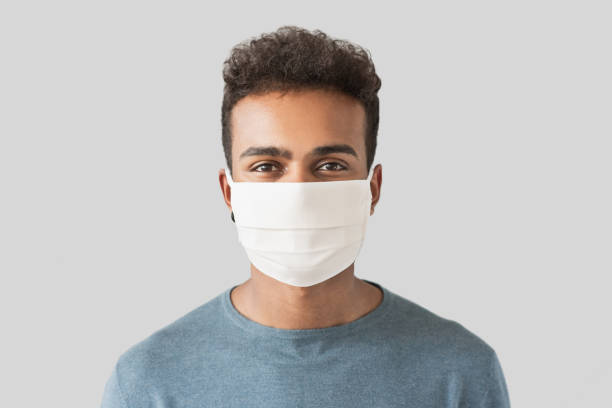

1/1 [==============================] - 0s 261ms/step
[[0.33895853 0.92150223]]
1
The person in the image is wearing a mask


In [40]:
input_image_path = input("Path of the image to be predicted: ")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255.0

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print("The person in the image is wearing a mask")
else:
  print("The Person in the iomage is not wearing a mask")